<a href="https://colab.research.google.com/github/LaetitiaBeignon/Numerical-Analysis/blob/master/Lab7_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Interpolation


In [1]:
# Lagrange Polynomials in Python
import numpy as np
from random import *

def  lagrange(x,i,xm):
  """
  Evaluates  the i-th  Lagrange  polynomial  at point x 
  based on grid  data xm
  """
  n=len(xm)-1
  y=1.
  for j in  range(n+1):
    if i!=j:
      y*=(x-xm[j])/(xm[i]-xm[j])
  return y


def  interpolation(x,xm ,ym):
  n=len(xm)-1
  lagrpoly=np.array([lagrange(x,i,xm) for i in range(n+1)])
  y = np.dot(ym ,lagrpoly)
  return y


pts = randint(3,20)
xm = np.linspace(0,10,pts)
ym = np.sin(xm)
xplot = np.linspace(-0.1,10.1,100)
yplot = interpolation(xplot, xm, ym)

print('X dataponts: ',xm)
print('Y dataponts: ',ym)

## Computing the error ## 

error= abs(yplot-np.sin(xplot))


X dataponts:  [ 0.  2.  4.  6.  8. 10.]
Y dataponts:  [ 0.          0.90929743 -0.7568025  -0.2794155   0.98935825 -0.54402111]


# Plot the results


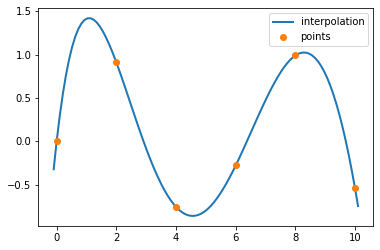

In [2]:
def polyplot(xm, ym, xplot, yplot):
  # Import pyplot as plt
  import matplotlib.pyplot as plt

  #plot the function

  plt.plot(xplot, yplot, lw=2, label='interpolation')

  plt.plot(xm, ym, 'o', label='points')

  plt.legend()
  plt.show()

polyplot(xm, ym, xplot, yplot)  

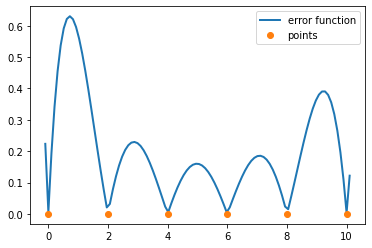

In [3]:
import matplotlib.pyplot as plt
yy = np.linspace(0,0,len(xm))
plt.plot(xplot, error, lw=2, label='error function')
plt.plot(xm, yy, 'o', label='points' )
plt.legend()
plt.show()


What we can notice is that the error is smaller near the points (nodes) and bigger in the other regions.

# Newton Base

In [4]:
def poly_newton_coefficient(x, y):
    """
    x: list or np array contanining x data points
    y: list or np array contanining y data points
    """

    m = len(x)

    x = np.copy(x)
    a = np.copy(y).astype(float)

    for k in range(1, m):
        for i in range(m-1, k-1, -1):
            a[i] = float(a[i]-a[i-1])/float(x[i]-x[i-k])
            
    return a

def newton_interpolation(x, x_data, y_data):
    """
    x: evaluation point(s)
    x_data: data points at x
    y_data: data points at y
     """
    a = poly_newton_coefficient(x_data, y_data)
    n = len(x_data) - 1  # Degree of polynomial
    p = a[n]
    print("array a = ",a)

    for k in range(1, n + 1):
        p = a[n - k] + (x - x_data[n - k])*p

    return p



#xm = np.array([-1,0,1,2])
#ym = np.array([5,1,1,11])
#xplot = np.linspace(-1.1,2.1,100)
#xplot = np.array([-1,0,1,2])


pts = randint(3,20)
xm = np.linspace(0,10,pts)
ym = np.sin(xm)
xplot = np.linspace(-0.1,10.1,100)
yplot = newton_interpolation(xplot, xm, ym)

## Computing the error ## 

error= abs(yplot-np.sin(xplot))

array a =  [ 0.          0.45464871 -0.32192467  0.09831009 -0.01580986  0.00099728]


# Plot the results

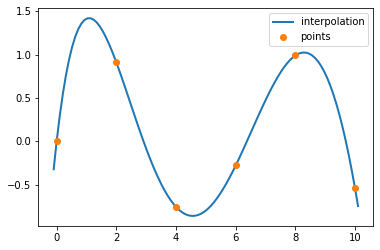

In [5]:
polyplot(xm, ym, xplot, yplot) 

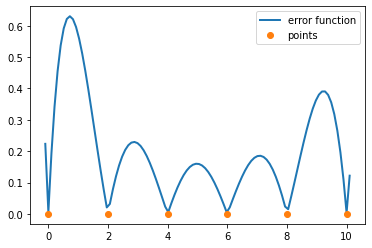

In [6]:
import matplotlib.pyplot as plt
yy = np.linspace(0,0,len(xm))
plt.plot(xplot, error, lw=2, label='error function')
plt.plot(xm, yy, 'o', label='points' )
plt.legend()
plt.show()

What we can notice is that the error is smaller near the points (nodes) and bigger in the other regions.